Saving customer_data.csv to customer_data (11).csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebV

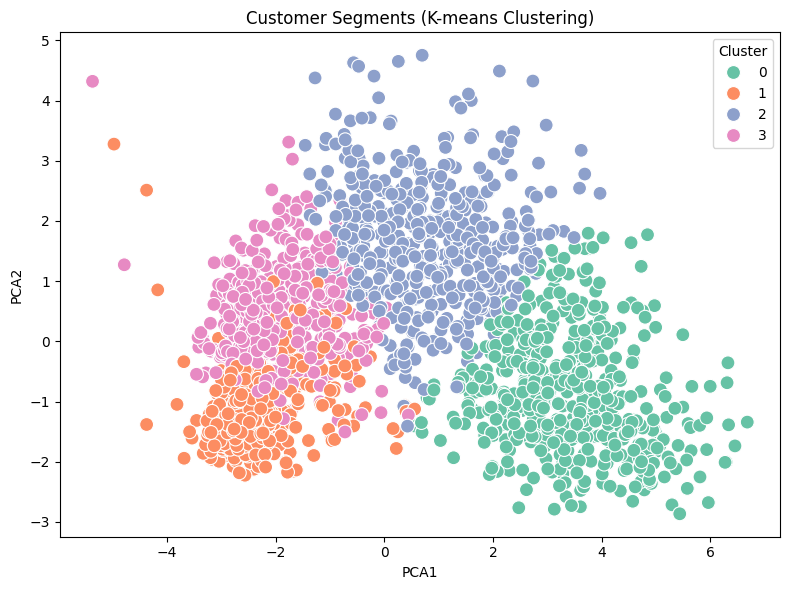

<ipython-input-12-f988b54c8d87>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Income', data=df, palette='Set2')


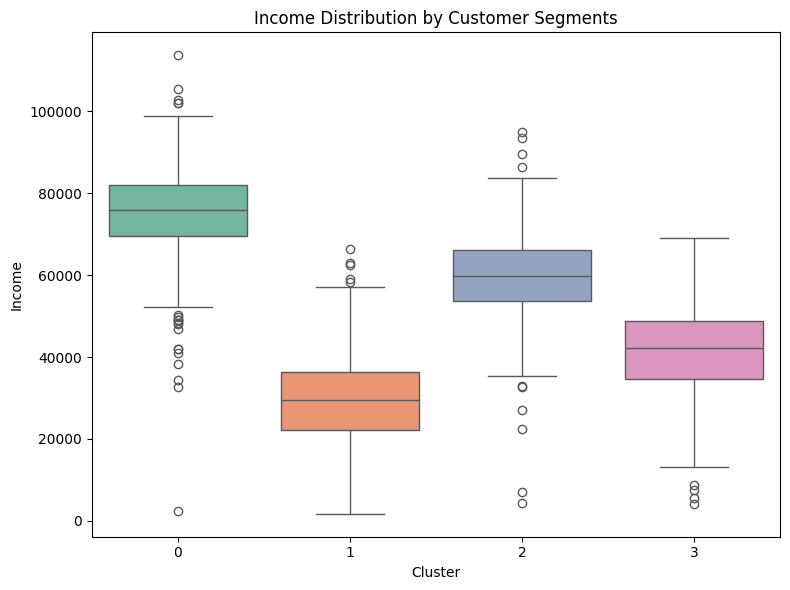

<ipython-input-12-f988b54c8d87>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='MntWines', data=df, palette='viridis')


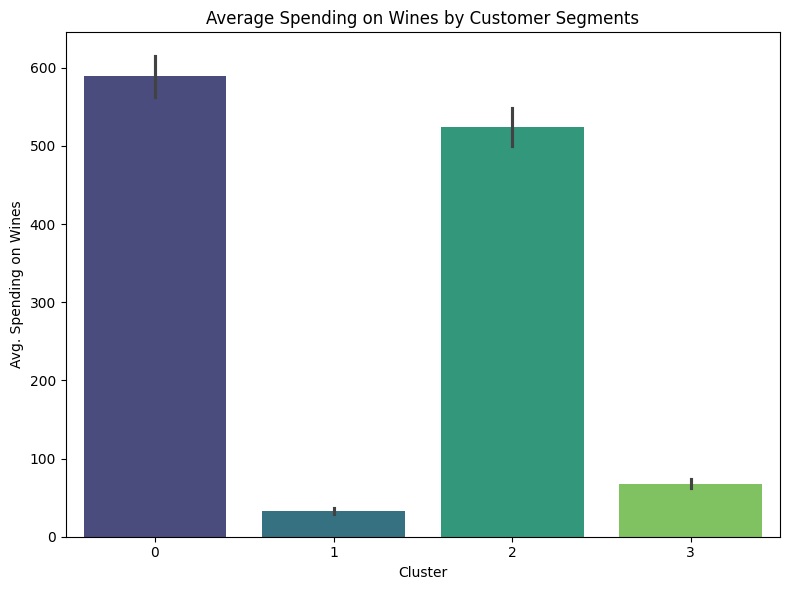

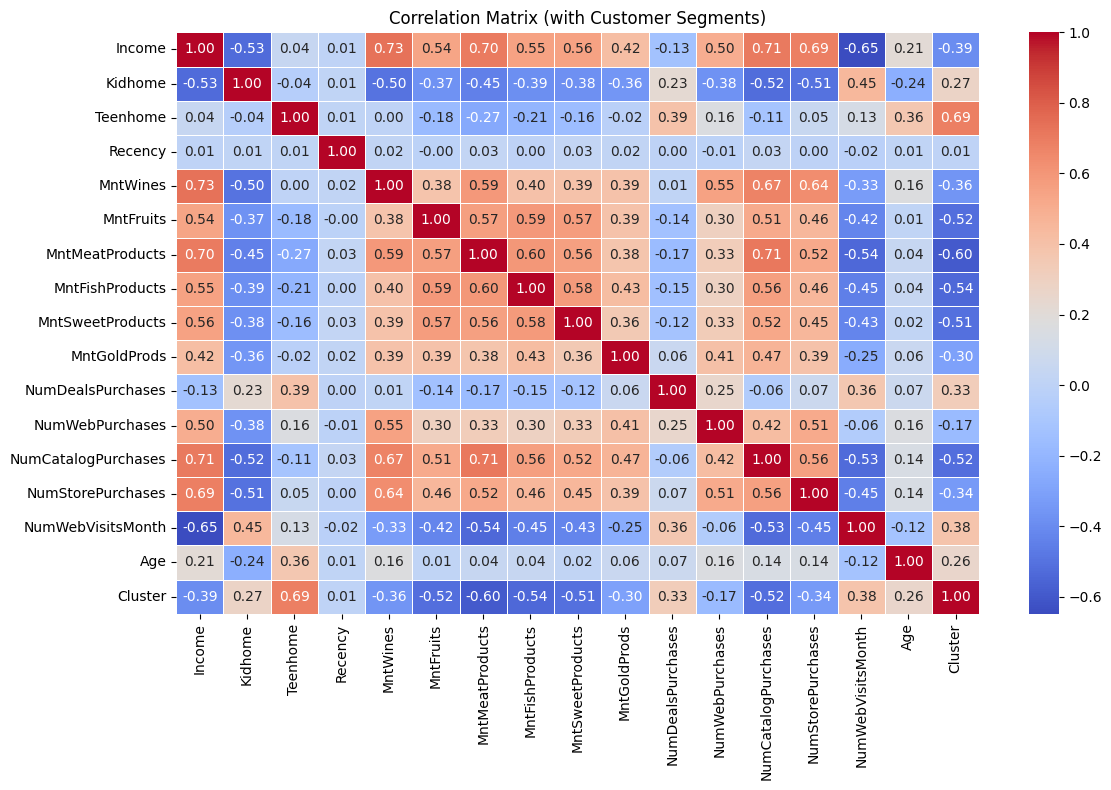

Silhouette Score: 0.16692691998534975


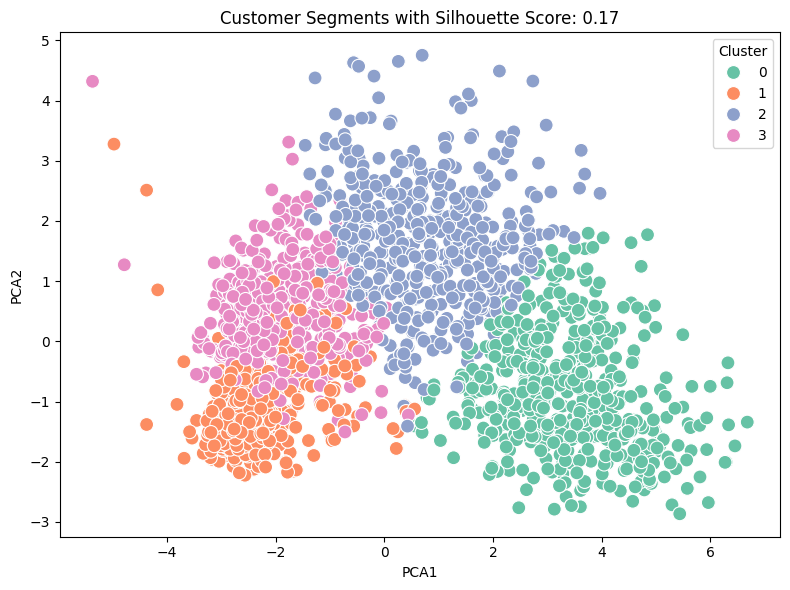

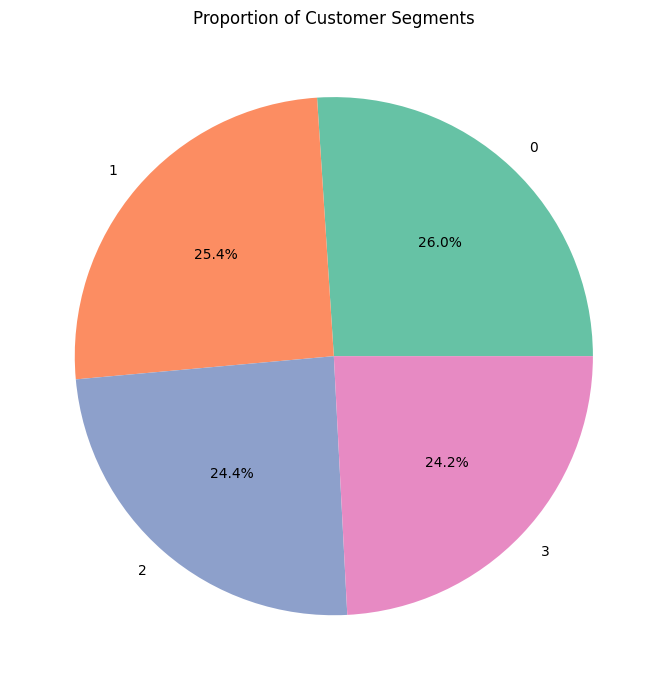

Recommendations: Tailor marketing strategies for each segment based on their spending habits and preferences.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from google.colab import files

uploaded = files.upload()

df = pd.read_csv('customer_data.csv')

print("Dataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

df = df.fillna(df.median())

features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'Age']

df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2', s=100)
plt.title('Customer Segments (K-means Clustering)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=df, palette='Set2')
plt.title('Income Distribution by Customer Segments')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='MntWines', data=df, palette='viridis')
plt.title('Average Spending on Wines by Customer Segments')
plt.xlabel('Cluster')
plt.ylabel('Avg. Spending on Wines')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
df_corr = df[features + ['Cluster']].corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (with Customer Segments)')
plt.tight_layout()
plt.show()

silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2', s=100)
plt.title(f'Customer Segments with Silhouette Score: {silhouette_avg:.2f}')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 7))
df['Cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Set2", 4), legend=False)
plt.title('Proportion of Customer Segments')
plt.ylabel('')
plt.tight_layout()
plt.show()

print("Recommendations: Tailor marketing strategies for each segment based on their spending habits and preferences.")